<a href="https://colab.research.google.com/github/Tavo826/UN/blob/main/AnaliticaDeDatos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import matplotlib.image as mpimg

from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Bases de datos

In [ ]:
# Contagios (Novel)
csv_covid_cont = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'

# Muertes
csv_covid_muer = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv'

# Recuperados
csv_covid_recu = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv'

# Data completo
csv_covid_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv'

# Data muy completo
csv_covid_Global = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

Xdata_cont = pd.read_csv(csv_covid_cont)
Xdata_muer = pd.read_csv(csv_covid_muer)
Xdata_recu = pd.read_csv(csv_covid_recu)
Xdata_glob = pd.read_csv(csv_covid_global)
Xdata_Glob = pd.read_csv(csv_covid_Global)

## Acondicionamiento

In [ ]:
serie_cont = np.array(Xdata_cont)[:,4:]
y_cont = np.array(Xdata_cont)[:,1]

serie_muer = np.array(Xdata_muer)[:,4:]
y_muer = np.array(Xdata_muer)[:,1]

serie_recu = np.array(Xdata_recu)[:,4:]
y_recu = np.array(Xdata_recu)[:,1]

print('Contagiados', Xdata_cont.shape)
print('y', y_cont.shape)

print('Muertos', Xdata_muer.shape)
print('y', y_muer.shape)

print('Recuperados', Xdata_recu.shape)
print('y', y_recu.shape)

Contagiados (266, 180)
y (266,)
Muertos (266, 180)
y (266,)
Recuperados (253, 180)
y (253,)


In [ ]:
Xdata_globC = Xdata_glob.copy()
Xdata_globC = Xdata_globC.drop(['Lat',
                              'Long_', 
                              'Country_Region', 
                              'Last_Update',
                              'Incident_Rate',
                              'People_Tested',
                              'People_Hospitalized',
                              'Mortality_Rate',
                              'UID',
                              'ISO3'], axis=1)

Xdata_Glob = Xdata_Glob.drop(['iso_code',
                'continent',
                'date',
                'total_tests', 
                'new_tests', 
                'total_tests_per_thousand',
                'new_tests_per_thousand',
                'new_tests_smoothed',
                'new_tests_smoothed_per_thousand',
                'tests_units',
                'extreme_poverty',
                'female_smokers',
                'male_smokers'], axis=1)

In [ ]:
pais = np.unique(Xdata_Glob['location'])

indices = np.zeros(len(pais))
num = 0
for i in range(len(indices)):
  while Xdata_Glob['location'][num] == pais[i]:
    num += 1
  indices[i] = num

#print(indices)

col = Xdata_Glob.columns
Xdata_new = []
for i in indices:
 Xdata_new.append(np.array(Xdata_Glob)[int(i-1)])

Xdata_new = pd.DataFrame(Xdata_new)
Xdata_new.columns = col

Xdata_new = Xdata_new.fillna(0)

In [ ]:
Xdata_new.head()

,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Afghanistan,34994.0,254.0,1094.0,49.0,898.934,6.525,28.103,1.259,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.50,64.83
1,Albania,3752.0,85.0,101.0,4.0,1303.774,29.536,35.096,1.390,0.0,2877800.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,0.000,2.89,78.57
2,Algeria,20770.0,554.0,1040.0,12.0,473.649,12.634,23.717,0.274,0.0,43851043.0,17.348,29.1,6.211,3.857,13913.839,278.364,6.73,83.741,1.90,76.88
3,Andorra,862.0,1.0,52.0,0.0,11156.410,12.942,673.008,0.000,0.0,77265.0,163.755,0.0,0.000,0.000,0.000,109.135,7.97,0.000,0.00,83.73
4,Angola,576.0,51.0,27.0,1.0,17.526,1.552,0.822,0.030,0.0,32866268.0,23.890,16.8,2.405,1.362,5819.495,276.045,3.94,26.664,0.00,61.15


# Análisis exploratorio

## Contagiados

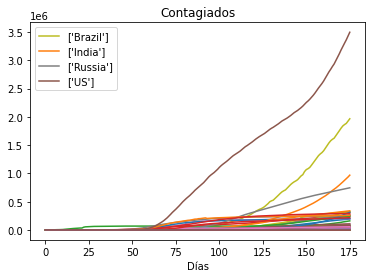

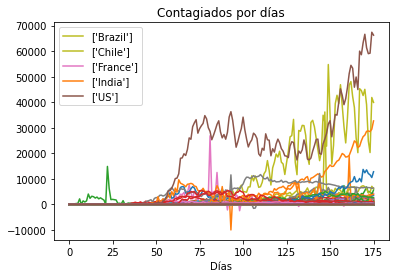

In [ ]:
for i in range(serie_cont.shape[0]):
  if any(serie_cont[i,:] > 0.5e6):
    label_cont = []
    label_cont.append(y_cont[i])
    plt.plot(serie_cont[i,:], label=label_cont)    
  else:
    plt.plot(serie_cont[i,:])

plt.title('Contagiados')
plt.legend(loc='upper left')
plt.xlabel('Días')
plt.show()

for i in range(serie_cont.shape[0]):
    serie_cont_d = np.append(0,np.diff(serie_cont[i,:]))
    if any(serie_cont_d > 20e3):
      label_d = []
      label_d.append(y_cont[i])
      plt.plot(serie_cont_d, label=label_d)
    else:
      plt.plot(serie_cont_d)

plt.title('Contagiados por días')
plt.xlabel('Días')
plt.legend(loc='upper left')
plt.show()

## Muertos

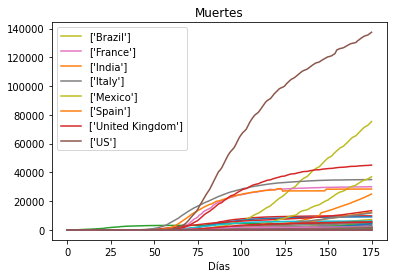

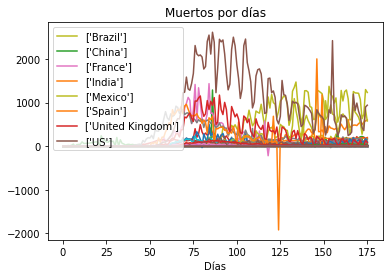

In [ ]:
for i in range(serie_muer.shape[0]):
  if any(serie_muer[i,:] > 20e3):
    label_muer = []
    label_muer.append(y_muer[i])
    plt.plot(serie_muer[i,:], label=label_muer)    
  else:
    plt.plot(serie_muer[i,:])

plt.title('Muertes')
plt.legend(loc='upper left')
plt.xlabel('Días')
plt.show()

for i in range(serie_muer.shape[0]):
    serie_muer_d = np.append(0,np.diff(serie_muer[i,:]))
    if any(serie_muer_d > 1e3):
      label_d = []
      label_d.append(y_muer[i])
      plt.plot(serie_muer_d, label=label_d)
    else:
      plt.plot(serie_muer_d)

plt.title('Muertos por días')
plt.xlabel('Días')
plt.legend(loc='upper left')
plt.show()

## Recuperados

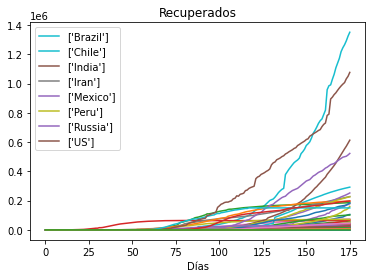

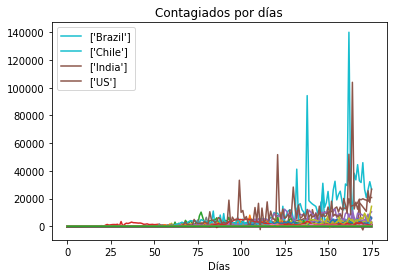

In [ ]:
for i in range(serie_recu.shape[0]):
  if any(serie_recu[i,:] > 200e3):
    label_recu = []
    label_recu.append(y_recu[i])
    plt.plot(serie_recu[i,:], label=label_recu)    
  else:
    plt.plot(serie_recu[i,:])

plt.title('Recuperados')
plt.legend(loc='upper left')
plt.xlabel('Días')
plt.show()

for i in range(serie_recu.shape[0]):
    serie_recu_d = np.append(0,np.diff(serie_recu[i,:]))
    if any(serie_recu_d > 20e3):
      label_d = []
      label_d.append(y_recu[i])
      plt.plot(serie_recu_d, label=label_d)
    else:
      plt.plot(serie_recu_d)

plt.title('Contagiados por días')
plt.xlabel('Días')
plt.legend(loc='upper left')
plt.show()

## Totales

In [ ]:
Xdata_glob_sum = Xdata_globC.sum()
pd.DataFrame(Xdata_glob_sum).transpose()

,Confirmed,Deaths,Recovered,Active
0,13589273.0,584990.0,7607033.0,5440736.0


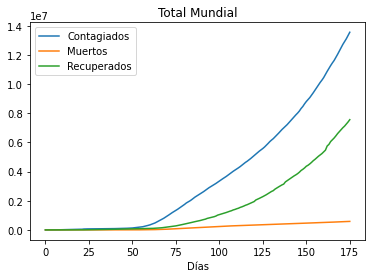

In [ ]:
Xdata_cont_sum = np.zeros(serie_cont[1].shape)
for i in range(len(Xdata_cont_sum)):
  Xdata_cont_sum[i] = serie_cont[:,i].sum()

plt.plot(Xdata_cont_sum, label='Contagiados')

Xdata_muer_sum = np.zeros(serie_muer[1].shape)
for i in range(len(Xdata_muer_sum)):
  Xdata_muer_sum[i] = serie_muer[:,i].sum()

plt.plot(Xdata_muer_sum, label='Muertos')

Xdata_recu_sum = np.zeros(serie_recu[1].shape)
for i in range(len(Xdata_recu_sum)):
  Xdata_recu_sum[i] = serie_recu[:,i].sum()

plt.plot(Xdata_recu_sum, label='Recuperados')

plt.title('Total Mundial')
plt.xlabel('Días')
plt.legend()
plt.show()

## Comparaciones

### Base de datos Completa

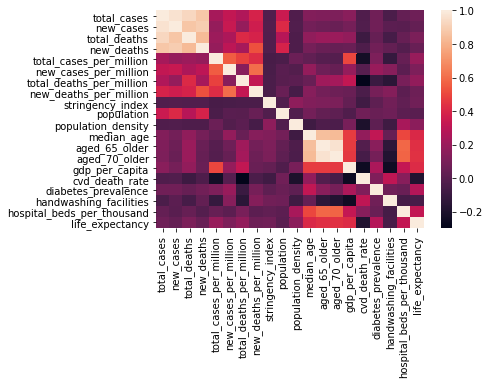

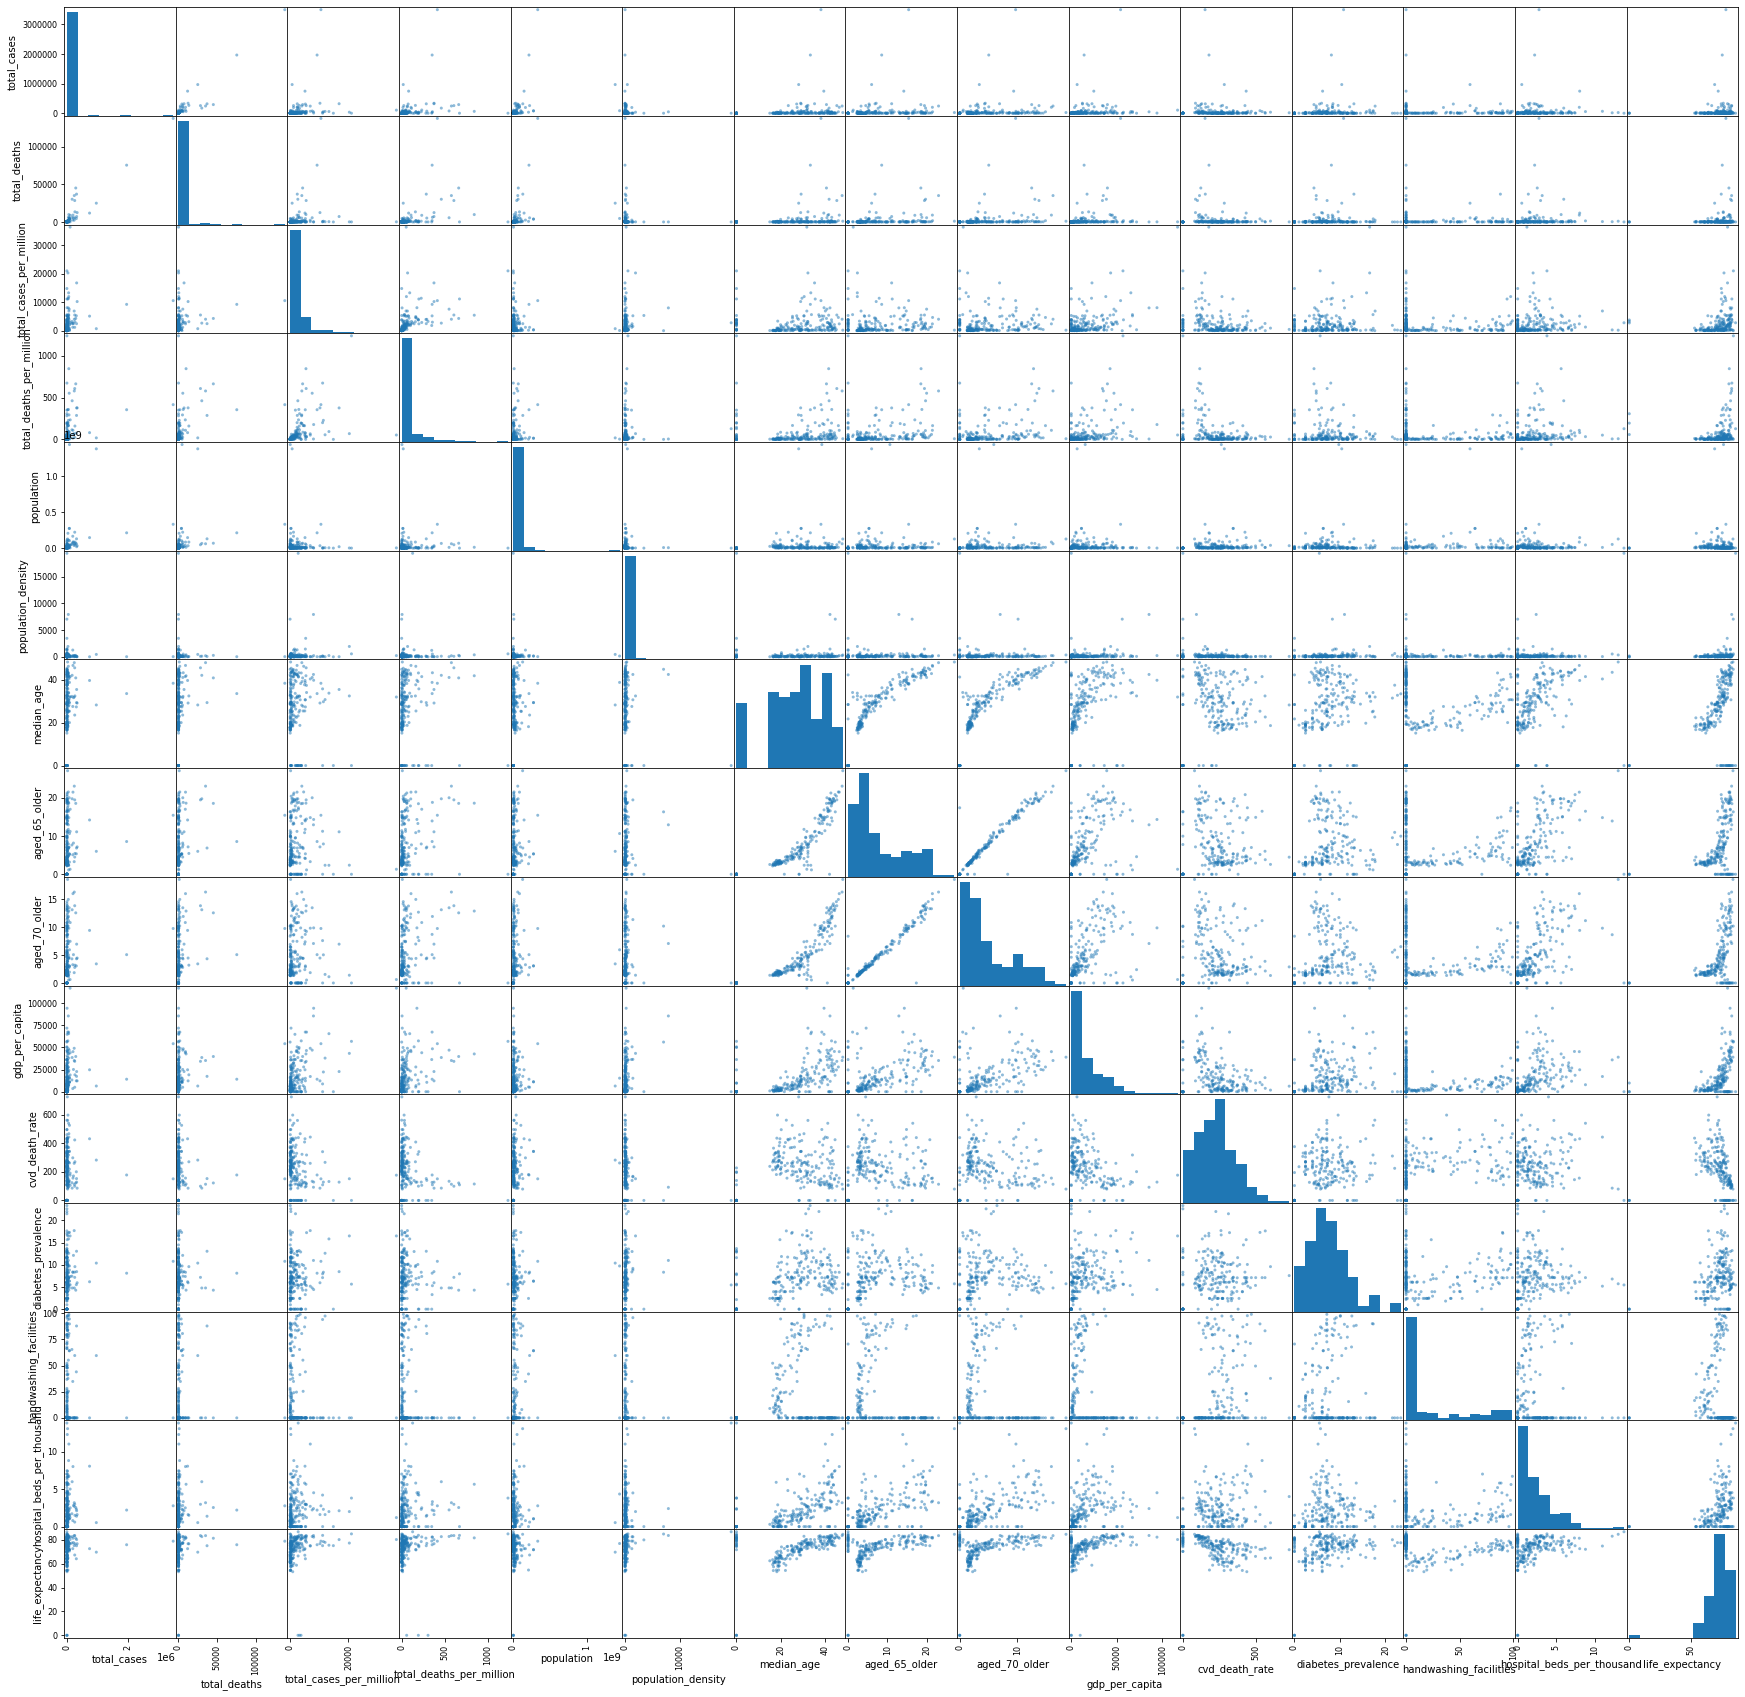

In [ ]:
#matriz de correlación
import seaborn as sns
from pandas.plotting import scatter_matrix

corr_matrix = Xdata_new.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)

plt.show()

attributes = ['total_cases', 'total_deaths', 'total_cases_per_million',	'total_deaths_per_million',	'population',
              'population_density',	'median_age', 'aged_65_older',	'aged_70_older',
              'gdp_per_capita',	'cvd_death_rate', 'diabetes_prevalence', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy']
scatter_matrix(Xdata_new[attributes], figsize=(30, 30))
print()

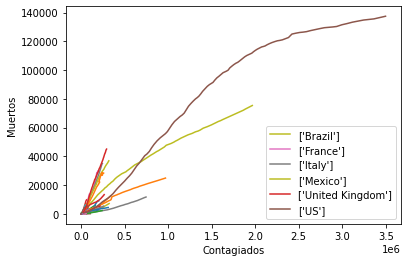

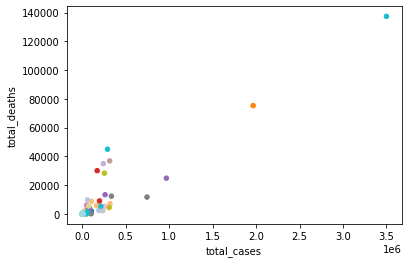

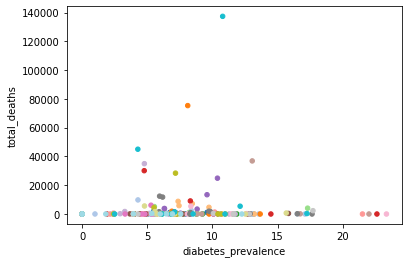

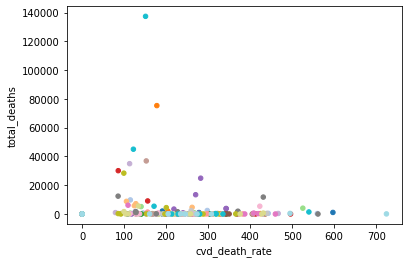

In [ ]:
label_mvsc = []
for i in range(serie_cont.shape[0]):
  if any(serie_muer[i,:] > 30e3):
    label_reg = []
    label_reg.append(y_cont[i])
    plt.plot(serie_cont[i,:], serie_muer[i,:], label=label_reg)
    label_mvsc.append(y_cont[i])
  else:
    plt.plot(serie_cont[i,:], serie_muer[i,:])

plt.xlabel('Contagiados')
plt.ylabel('Muertos')
plt.legend()
plt.show()

Xdata_new.plot(kind="scatter", 
                  x="total_cases",
                  y="total_deaths",
                  c=Xdata_new.index,
                  cmap=plt.get_cmap('tab20'),
                  colorbar=False,)

plt.show()

Xdata_new.plot(kind="scatter", 
                  x="diabetes_prevalence",
                  y="total_deaths",
                  c=Xdata_new.index,
                  cmap=plt.get_cmap('tab20'),
                  colorbar=False,)

plt.show()

Xdata_new.plot(kind="scatter", 
                  x="cvd_death_rate",
                  y="total_deaths",
                  c=Xdata_new.index,
                  cmap=plt.get_cmap('tab20'),
                  colorbar=False,)

plt.show()

In [ ]:
# Xdata_new.plot(kind='scatter', x='total_cases', y='total_deaths',
#                alpha=0.5)

world_img = mpimg.imread(
    #'/content/drive/My Drive/un/9/Analítica/Project/Punto 3/Mapamundi-político-para-imprimir.jpg')
    '/content/drive/My Drive/un/9/Analítica/Project/Punto 3/índice.jpg')

ax = Xdata_cont.plot(kind='scatter', x='Long', y='Lat',
                alpha=0.4,
                c=Xdata_cont.iloc[:,-1],
                cmap=plt.get_cmap('jet'),
                colorbar=False,
                s=Xdata_cont.iloc[:,-1]/1500,
                label='contagiados',
                figsize=(10,8)
                )
plt.imshow(world_img, extent=[-175, 205, -70, 120], 
         alpha=0.5,
         cmap=plt.get_cmap("jet"))

plt.show()

FileNotFoundError: ignored

In [ ]:
import plotly.express as px

figure = px.choropleth(Xdata_new,locations='location',
                       #lat='Lat',
                       #lon='Long_',
                       locationmode='country names',
                       color='total_cases', 
                       #hover_name='Confirmed', 
                       color_continuous_scale='tealgrn', 
                       range_color=[1,1000000],
                       title='Countries with Confirmed cases')
figure.show()

In [ ]:
Xdata_new.columns

In [ ]:
Tabla1 = Xdata_new.copy().sort_values('aged_65_older',
                         ascending=False).reset_index(drop=True).style.bar(align='left',                                                                   width=98)

Tabla1

In [ ]:
for i in range(0,len(label_mvsc)):
  item = 0
  if str(label_mvsc[i]) == 'US':
    label_mvsc[i] = 'United States'
  while str(label_mvsc[i]) != Tabla1.data['location'][item]:
    item += 1
  print('El país ' + label_mvsc[i] + 
        ' se encuentra en la posición ' + str(item+1) + 
        ' de la tabla')

### Base de datos global

In [ ]:
Xdata_glob = Xdata_glob.drop(['Lat',
                              'Long_', 
                              'Last_Update',
                              'People_Tested',
                              'People_Hospitalized',
                              'UID',
                              'ISO3'], axis=1)
Xdata_glob = Xdata_glob.fillna(1)

corr_matrix = Xdata_glob.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)

plt.show()

attributes = ['Confirmed', 'Deaths', 'Recovered', 'Active',
              'Incident_Rate', 'Mortality_Rate']
scatter_matrix(Xdata_glob[attributes], figsize=(30, 30))
print()

In [ ]:
Xdata_glob.plot(kind='scatter',  
                  x="Confirmed",
                  y="Recovered",
                  c=Xdata_glob.index,
                  cmap=plt.get_cmap('tab20'),
                  colorbar=False,
                )

plt.show()

In [ ]:
Xdata_glob.head(16)

In [ ]:
figure = px.choropleth(Xdata_glob,locations='Country_Region',
                       #lat='Lat',
                       #lon='Long_',
                       locationmode='country names',
                       color='Recovered', 
                       #hover_name='Confirmed', 
                       color_continuous_scale='tealgrn', 
                       range_color=[1,1000000],
                       title='Countries with Recovered cases')
figure.show()

In [ ]:
pd.DataFrame(Xdata_glob).columns

In [ ]:
from sklearn.cluster import KMeans

Xdata_globC = Xdata_glob.copy()
Xdata_kmeans = Xdata_globC.loc[:, ['Confirmed', 
                                   'Recovered']]

kmeans = KMeans(n_clusters=5).fit(Xdata_kmeans)
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
plt.scatter(Xdata_kmeans['Confirmed'],
            Xdata_kmeans['Recovered'],
            c=kmeans.labels_.astype(float))
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

In [ ]:
rate = []
etiqueta = []
label_c = []

rate = np.append(rate, np.array(Xdata_glob['Confirmed']) / np.array(Xdata_glob['Recovered']))
Xdata_glob['Recovered_rate'] = rate

for i in Xdata_glob['Recovered_rate']:
  if (i < 1.2):
    etiqueta.append(0)
    label_c.append('Bajo')
  elif (i >= 1.2 and i < 3.3):
    etiqueta.append(1)
    label_c.append('Medio')
  else:
    etiqueta.append(2)
    label_c.append('Alto')

etiqueta = np.array(etiqueta)
Xdata_glob['Label'] = etiqueta

label_ = np.array(label_c)

print(np.unique(etiqueta))

Xdata_glob.head(3)

# Clasificación

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Data = Xdata_glob.copy()

ydata_train = Data.iloc[:,-1]
Xdata_train = Data.drop(['Label',
                         'Country_Region'], axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata_train, 
                                                ydata_train, 
                                                test_size=0.2) 

Xdata_train.head()

In [ ]:
Xtrain=scaler.fit_transform(abs(Xtrain))
Xtest=scaler.fit_transform(abs(Xtest))
Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)
Xtest = np.array(Xtest)
ytest = np.array(ytest)

print(Xdata_train.shape)
print(ydata_train.shape)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

steps = [
    
    [
        ('rep', PCA()),
        ('cla', GaussianNB())
    ],
    
    [
        ('rep', PCA()),
        ('cla', SGDClassifier(loss='hinge'))
    ],
    
    [
        ('rep', PCA()),
        ('cla', SGDClassifier(loss='log'))
    ],
    
    [
        ('rep', PCA()),
        ('cla', SGDClassifier(loss='modified_huber'))
    ],
    
    [
        ('rep', PCA()),
        ('cla', LinearDiscriminantAnalysis(solver='svd'))
    ],
    
    [
        ('rep', PCA()),
        ('cla', LinearDiscriminantAnalysis(solver='eigen',
                                          shrinkage='auto'))
    ],
    
    [
        ('rep', PCA()),
        ('cla', QuadraticDiscriminantAnalysis())
    ],
    
    [
        ('rep', PCA()),
        ('cla', KNeighborsClassifier(algorithm='auto'))
    ],
        
    [
        ('rep', PCA()),
        ('cla', KNeighborsClassifier(algorithm='ball_tree'))
    ],
    
    [
        ('rep', PCA()),
        ('cla', LogisticRegression(solver='lbfgs'))
    ],
                                     
    
    [
        ('rep', PCA()),
        ('cla', LogisticRegression(solver='newton-cg'))
    ],
    
    [
        ('rep', PCA()),
        ('cla', SVC(kernel='rbf'))
    ],
    
    [
        ('rep', PCA()),
        ('cla', SVC(kernel='sigmoid',
                   decision_function_shape='ovr'))
    ],
    
    [
        ('rep', PCA()),
        ('cla', RandomForestClassifier(max_features='auto'))
    ],
    
    [
        ('rep', PCA()),
        ('cla', RandomForestClassifier(max_features='log2'))
    ],
    
]

parameters = [
    
    {
        'rep__n_components': [0.1, 0.5, 0.9]        
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__alpha': [0.0001, 0.1, 0.5, 1]    
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__alpha': [0.0001, 0.1, 0.5, 1]    
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__alpha': [0.0001, 0.1, 0.5, 1],
        'cla__epsilon': [0.1, 0.5, 0.9]
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9]        
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9]        
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__reg_param': [0, 0.5, 1]
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__n_neighbors': [0.1, 1, 3, 5]
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__n_neighbors': [0.1, 1, 3, 5]
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__C': [0.1, 0.5, 1]
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__C': [0.1, 0.5, 1]
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__C': [0.1, 0.5, 1]
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__C': [0.1, 0.5, 1]
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__n_estimators': [20, 100, 300, 500]
    },
    
    {
        'rep__n_components': [0.1, 0.5, 0.9],
        'cla__n_estimators': [20, 100, 300, 500]
    },
    
]

label_models = [
    
    'Naive',
    'SGD_hinge',
    'SGD_log',
    'SGD_huber',
    'LDA_svd',
    'LDA_eigen',
    'QDA',
    'KN_auto',
    'KN_ballTree',
    'Log_lbfgs',
    'Log_newton',
    'SVC_rbf',
    'SVC_sigmoid',
    'RandFo_auto',
    'RandFo_log2'    
]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib

best_model = []
score = np.zeros(len(steps))

for i in range(len(steps)):
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=5,
                                scoring='balanced_accuracy',verbose=5)
    grid_search.fit(Xtrain, ytrain)
    print('Score: ', grid_search.best_score_)
    score[i] = grid_search.best_score_
    #mejor modelo entrenado
    best_model += [grid_search.best_estimator_]

print('Mejores modelos:\n')
best_model

In [ ]:
# Graficar matriz de confusión

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

for i in range(len(best_model)):
    print('Evaluando modelo %d/%d' % (i+1,len(best_model)))

    ytest_e = best_model[i].predict(Xtest)
    acc = accuracy_score(ytest, ytest_e)
  
    plot_confusion_matrix(
                          ytest, ytest_e, 
                          classes = np.unique(label_c),
                          normalize = True,
                          title=label_models[i]
                          )
    plt.autoscale()
    #save_fig(img_path, label_models[i])                      
    plt.show()
    
    cr = classification_report(
                               ytest, ytest_e, 
                               #labels=range(label_c.shape[0]),
                               target_names=np.unique(label_c)
                               )                          
    #support = #muestras en la clase estudiada
    print(cr)

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import numpy as np
from scipy.stats import multivariate_normal as mn

from random import randint, random
inicio=np.random.rand(120,1)

Xdata_newC = Xdata_new.copy()
contagiados1=np.array(Xdata_newC['total_cases'])
muertos1=np.array(Xdata_newC['total_deaths'])


In [ ]:
cov=np.cov(muertos1, contagiados1)
print(cov)
print(cov[0,1])
print(np.cov(muertos1))
print(np.cov(contagiados1))

v1=np.var(muertos1)
v2=np.var(contagiados1)
print(v1)
print(v2)
mmr=muertos1.mean()
mct=contagiados1.mean()
print(mmr)
print(mct)

In [ ]:
#clase 1 
mu1 = np.array([mmr,mct]) 
cov1 = np.array([[cov[0,0], cov[0,1]],[cov[1,0],cov[1,1]]]) #.fit -> estimar la cov1
N1 = 120 # numero puntos c1 -> estimar desde etiquetas
pdf1 = mn(mu1, cov1) # objeto scipy ara evaluar o muestrear gaussiana multivariada
print(cov1)
N2 = 120

X = np.r_[muertos1] 
y = np.r_[contagiados1] 

#xx, yy = np.mgrid[1.5*min(X[:]):1.5*max(X[:]):10, 1.5*min(X[:]):1.5*max(X[:]):10] #graficar pdf en espacio de caract. 2D
#pos = np.empty(xx.shape + (2,))
#pos[:, :, 0] = xx; pos[:, :, 1] = yy



In [ ]:
plt.figure(figsize=(4,5))
plt.scatter(Xdata_kmeans['total_deaths'],
            Xdata_kmeans['total_cases'],
            
            c=kmeans.labels_.astype(float))
#plt.scatter(X[:,0],X[:,1], c='y')
plt.scatter(mmr,mct, c='r', marker='d',s = 100)
#plt.contour(xx, yy, pdf1.pdf(pos)) #plotea gauseanas
plt.colorbar()
plt.grid()
plt.xlabel('muertos')
plt.ylabel('contagiados')
plt.show()


### TENDENCIA NUMERO DE MUERTOS POR CANTIDAD DE CONTAGIADOS EN TODOS LOS PAICES

In [ ]:
print(mct)
print(mmr)

